# House Prices: Advanced Regression Techniques

## ELEN4025: Introduction to Machine Learning

### Group Members:

<ol>
  <li>Mhlengeni Miya - 363729 https://www.kaggle.com/mhlengenimiya</li>
  <li>Thabani Jali - 1876297 https://www.kaggle.com/thabanimelusi</li>
  <li>George Marantos - 2116287 https://www.kaggle.com/georgemarantos</li>
</ol>
 
 ##### Kaggle link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/team 
***

### Introduction:
<p>Because of its significant implications on important businesses and fields such as building, investment, and public welfare, the real estate industry has been one of the primary research focuses on modern economics [1]. This project is based on Kaggle competion titled <em>House Prices: Advanced Regression Techniques</em>. This competition requires an estimate of the final price of each residential property in Ames, Iowa, given the 79 explanatory factors that describe every feature of residential properties there. The goal of this project is to create Machine Learning (ML) models based on advanced regression techniques to develop models that predict the price of the houses to highest degree.</p>

The Machine Learning models used in this project to train the model are:
<ol>
  <li>Multiple linear regression</li>
  <li>K Nearest Neigbours Regression</li>
  <li>Random Forest Regression</li>
</ol>

These models are trained on the train dataset and are verified on the data. Their performance is analysed and compared based on their validation results as well as the MSE accuracy on the Kaggle Submission. 


***

### Imports of Libraries

In [1]:
import numpy as np 
import pandas as pd 
import math

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from scipy.stats import skew


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import Ridge, ElasticNet,  Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xg

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Analysis & Exploration 
Data Analysis is performed on the dataset in order to better understand each feature in the dataset and how each feature contributes to the determination of the house prices. This will assist in the processing and cleaning of the datset. 

Firstly, we load the dataset and print a few entries. 

In [3]:
# Read in the train and test data and drop the Id column
data = pd.read_csv('train.csv') 
test = pd.read_csv("test.csv")

data_b = data.drop(['Id'], axis=1) 
test_b = test.drop(['Id'], axis=1) 
#Displaying first five rows of train dataset
data_b.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Displaying first five rows of test dataset
test_b.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Showing size of train and test dataset
print(data_b.shape)
print(test_b.shape)

(1460, 80)
(1459, 79)


## Looking at the target variable: 'SalePrice' ##

SalePrice is the target variable that the model is trained for.\
Therefore we perform analysis on the target variable and compare it against other variables in the dataset.\
First we look at the general stats of the target variable.

In [6]:
#Descriptive statistical summary of the train dataset
data_b['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Now we look at the distribution of the SalePrice

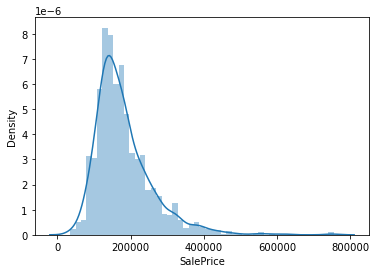

In [7]:
#Univiriate distribution plot of the saleprice
sns.distplot(data_b['SalePrice']);

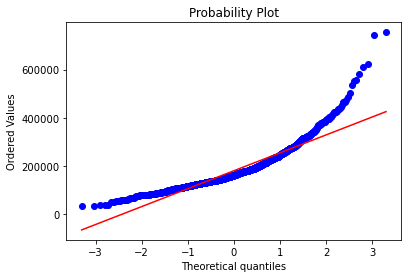

In [8]:
#QQ plot of SalePrice 
fig = plt.figure()
res = stats.probplot(data_b['SalePrice'], plot=plt)
plt.show()

As we can see from the plot above, SalePrice is not normally distributed.\
This is an issue for many ML regression models since some models assume normal distribution.\
Therefore a we need to normalize the distribution above to make it more fitting for the linear models.

We perform a log transformation of the SalePrice data and analyse the distrbution of the data as well as the fitting capabilities for linear models.

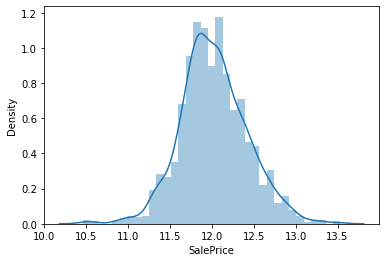

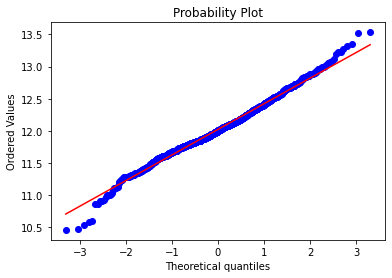

In [9]:
#log transformation of SalePrice
log_SalePrice = np.log1p(data_b["SalePrice"])
sns.distplot(log_SalePrice);

fig = plt.figure()
res = stats.probplot(log_SalePrice, plot=plt)
plt.show()


The SalePrice data is now more normally distrbuted and is better fitted for linear regression models.

## Numerical Data Distribution

In [10]:
#selecting numerical data in dataset
numerical_df = data_b.select_dtypes(include = ['float64', 'int64'])
numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


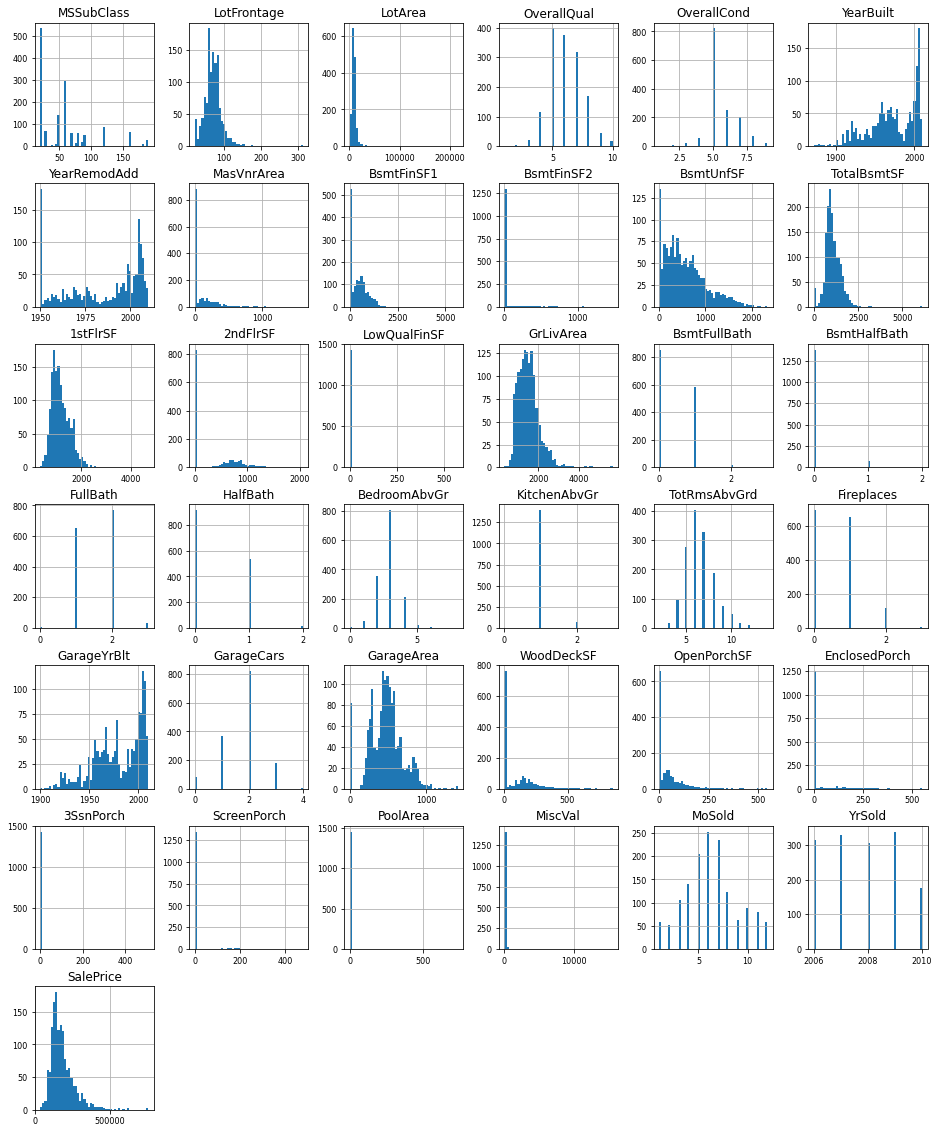

In [11]:
#Plotting all numerical data
numerical_df.hist(figsize=(16,20), bins =50, xlabelsize=8, ylabelsize=8);

From the plots above it can be seen that 'Lotfrontage', 'TotalBsmtSF', '1stFlrSF' and 'GrLivArea' have a similar distribution to the one we have with 'SalePrice'.\
Some features are seen to not have data that is useful for determination of the price. From the plots above, it is seen that having a pool area does not contribute to the house price as it has zero data. Similarly, we observe that a house having a feature of 'LowQualFinSF','EnclosedPorch','3SsnPorch' and 'ScreenPorch' has no contribution to the determination of the house sale price and can be removed from the dataset.

\
Lets look at the relationship between SalePrice and the data that has similar distributions to SalePrice.

### SalePrice vs GrLivArea

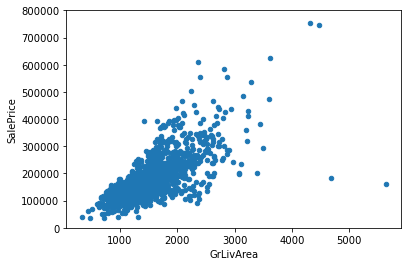

In [12]:
#Scatter plot of the saleprice vs GrLivArea
var = 'GrLivArea'
data = pd.concat([data_b['SalePrice'], data_b[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

From this plot we can see quite a strong linear relationship between GrLivArea and Sale price, however we do see two outliers that have a low SalePrice for a high GrLivArea.\
These outliers should be removed from the dataset.

### SalePrice vs Lotfrontage

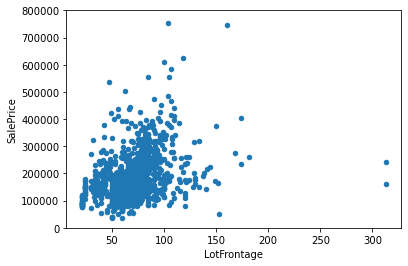

In [13]:
#Scatter plot of the saleprice vs LotFrontage
var = 'LotFrontage'
data = pd.concat([data_b['SalePrice'], data_b[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

For this comparison we dont see such a strong linear relationship between the two data variables. Two outliers can also be observed for a higher LotFrontage and will need to be removed from the data set. 

### SalePrice vs TotalBsmtSf

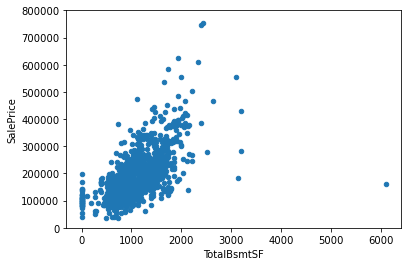

In [14]:
#Scatterplot of saleprice and TotalBsmtSf
var = 'TotalBsmtSF'
data = pd.concat([data_b['SalePrice'], data_b[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In this comparison we see a slight linear relationship, its on the edge of an exponential relationship.\
A single outlier is seen as well which can be removed in the data cleaning process

### SalePrice vs 1stFlrSF

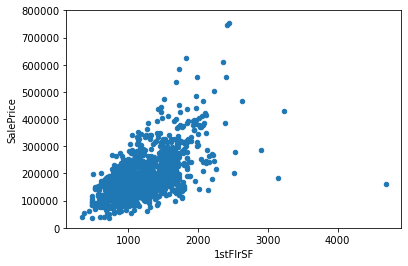

In [15]:
#scatterplot of Saleprice vs 1stFlrSF
var = '1stFlrSF'
data = pd.concat([data_b['SalePrice'], data_b[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The comparison between SalePrice and 1stFlrSF seems to be fairly linear and indeed having an outlier which will be removed during data cleaning.

### Data Correlation
We look at the correlation of the features and the SalePrice using a correlation map.\
This helps us to figure out which features correlate better with the SalePrice and can be used in the models.

<AxesSubplot:>

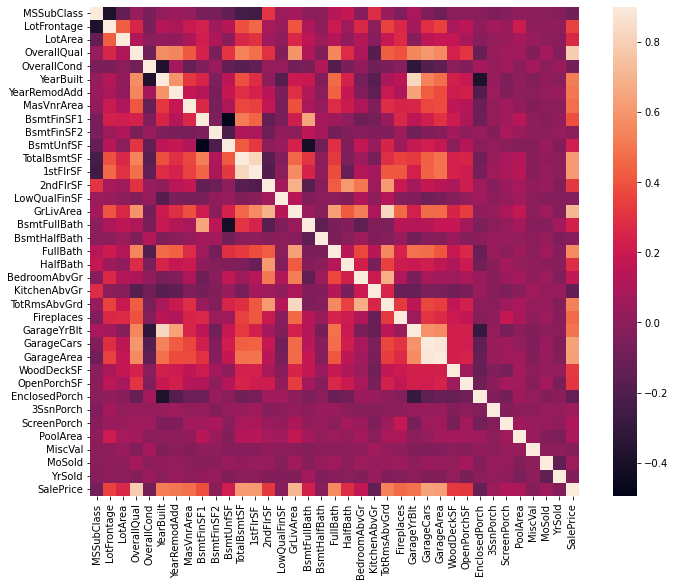

In [16]:
#Correlation map to see how features are correlated with SalePrice
corrmat = data_b.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Looking at missing data

In [17]:
# Analyse missing Values
# data.info()
data_b.isnull().sum().sort_values(ascending=False).head(20)
# test_b.isnull().sum().sort_values(ascending=False).head(34)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

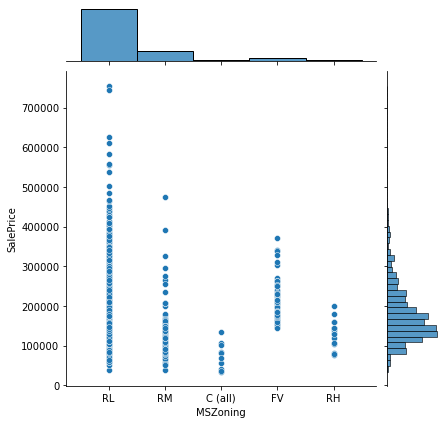


****INFO****
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

****VALUE COUNTS****
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

****VALUE AVG SALE PRICE****
MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

****TEST INFO****
count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

****VALUE COUNTS****
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Only in Train: []
Only in Test: []


In [18]:
# I analysed all features one-by-one using the following function
def analyse_feature(feature_name):
#     data_c[feature_name].hist()
#     plt.show()
    sns.jointplot(data=data_b, y="SalePrice", x=feature_name)
    plt.show()
    print("\n****INFO****")
    print(data_b[feature_name].describe())
    print("\n****VALUE COUNTS****")
    print(data_b[feature_name].value_counts())
    print("\n****VALUE AVG SALE PRICE****")
    print(data_b.groupby(feature_name)['SalePrice'].mean())
    if data_b[feature_name].dtype!="O":
        print("\nSkewness:",str(skew(data_b[feature_name])))

#     test_c[feature_name].hist()

    print("\n****TEST INFO****")
    print(test_b[feature_name].describe())
    print("\n****VALUE COUNTS****")
    print(test_b[feature_name].value_counts())
    
    print("\nOnly in Train: "+str(list(set(data_b[feature_name].value_counts().index.values) - set(test_b[feature_name].value_counts().index.values))))
    print("Only in Test: "+ str(list(set(test_b[feature_name].value_counts().index.values) - set(data_b[feature_name].value_counts().index.values))))
    
analyse_feature("MSZoning")

### Data cleaning
<p>Analyzing and cleaning the data in machine learning is of utmost importance. Machine learning models' effectiveness and dependability are directly impacted by the quality of the data. Issues like missing numbers, incorrect formatting, duplicate records, or outliers can be found and fixed thanks to the analysis and cleaning of the data. The model can produce more precise and reliable predictions by assuring excellent data quality. Machine learning models learn patterns and relationships from the data. If the data is flawed or contains errors, the model may learn incorrect or misleading patterns. Analyzing and cleaning the data helps in removing noise, inconsistencies, or biases, ensuring that the model is trained on accurate and reliable information, leading to more trustworthy and robust results.</p>

In [19]:
#AFTER ANALYSING EACH COLUMN -> FILL MISSING VALUES
test_b['MSZoning']=test_b['MSZoning'].fillna("C (all)") 
test_b['GarageCars']=test_b['GarageCars'].fillna(0) 
test_b['GarageArea']=test_b['GarageArea'].fillna(0) 
test_b['Functional']=test_b['Functional'].fillna("Typ") 
test_b['SaleType']=test_b['SaleType'].fillna("WD") 
test_b['SaleCondition']=test_b['SaleCondition'].fillna("Normal")
data_b['Fence']=data_b['Fence'].fillna("None") 
test_b['Fence']=test_b['Fence'].fillna("None") 
data_b['Electrical'] = data_b['Electrical'].fillna("SBrkr")
data_b['FireplaceQu'] = data_b['FireplaceQu'].fillna("None")
test_b['FireplaceQu'] = test_b['FireplaceQu'].fillna("None")
data_b['GarageType'] = data_b['GarageType'].fillna("None")
test_b['GarageType'] = test_b['GarageType'].fillna("None")
data_b['GarageQual'] = data_b['GarageQual'].fillna("None")
test_b['GarageQual'] = test_b['GarageQual'].fillna("None")
data_b['GarageCond'] = data_b['GarageCond'].fillna("None")
test_b['GarageCond'] = test_b['GarageCond'].fillna("None")
data_b['GarageFinish'] = data_b['GarageFinish'].fillna("None")
test_b['GarageFinish'] = test_b['GarageFinish'].fillna("None")
test_b['Exterior1st'] = test_b['Exterior1st'].fillna("VinylSd")
test_b['Exterior2nd']= test_b['Exterior2nd'].fillna("VinylSd")
data_b['MasVnrType'] = data_b['MasVnrType'].fillna("None")
test_b['MasVnrType'] = test_b['MasVnrType'].fillna("None")
data_b['MasVnrArea'] = data_b['MasVnrArea'].fillna(0)
test_b['MasVnrArea'] = test_b['MasVnrArea'].fillna(0)
test_b['BsmtHalfBath']=test_b['BsmtHalfBath'].fillna(0) 
test_b['BsmtFullBath']=test_b['BsmtFullBath'].fillna(0) 
test_b['KitchenQual']=test_b['KitchenQual'].fillna("Gd") 
test_b['TotalBsmtSF']=test_b['TotalBsmtSF'].fillna(0) 
test_b['BsmtUnfSF']=test_b['BsmtUnfSF'].fillna(0)
test_b['BsmtFinSF1']=test_b['BsmtFinSF1'].fillna(0) 
test_b['BsmtFinSF2']= test_b['BsmtFinSF2'].fillna(0) 
test_b['BsmtQual']=test_b['BsmtQual'].fillna("None") 
data_b['BsmtQual']=data_b['BsmtQual'].fillna("None")
test_b['BsmtCond']= test_b['BsmtCond'].fillna("None")
data_b['BsmtCond']= data_b['BsmtCond'].fillna("None")
test_b['BsmtExposure']= test_b['BsmtExposure'].fillna("None") 
data_b['BsmtExposure']= data_b['BsmtExposure'].fillna("None") 
test_b['Utilities']= test_b['Utilities'].fillna("AllPub") 
data_b['GarageYrBlt'] = data_b['GarageYrBlt'].fillna(1895)
test_b['GarageYrBlt'] = test_b['GarageYrBlt'].fillna(1895)

## Fixing Outliers
<p>Outliers, especially extreme ones, can disproportionately influence the training process and lead to suboptimal model performance. By removing them, the model can focus on learning patterns from the majority of the data, leading to improved predictive accuracy and reduced bias. Outliers can disrupt the learning process and cause the model to fit the noise or anomalies in the data rather than the underlying patterns. This can result in overfitting, where the model performs well on the training data but fails to generalize to new data. By addressing outliers, the risk of overfitting is reduced, allowing the model to generalize better to unseen data.</p>

In [20]:
#AFTER ANALYSING EACH COLUMN -> Fixing Outliers
test_b.loc[test.GarageYrBlt==2207,'GarageYrBlt'] = 2007 
test_b.loc[test_b.LotArea==1533,'LotFrontage'] = 21 
data_b.loc[data_b.LotArea>40000,'LotArea'] = 40000
test_b.loc[test_b.LotArea>40000,'LotArea'] = 40000
data_b.loc[data_b.LotFrontage>150,'LotFrontage'] = 150
test_b.loc[test_b.LotFrontage>150,'LotFrontage'] = 150
data_b.loc[data_b["1stFlrSF"]>3000,'1stFlrSF'] = 3000
test_b.loc[test_b["1stFlrSF"]>3000,'1stFlrSF'] = 3000
data_b.loc[data_b["GrLivArea"]>4000,'GrLivArea'] = 4000
test_b.loc[test_b["GrLivArea"]>4000,'GrLivArea'] = 4000
data_b.loc[data_b["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
test_b.loc[test_b["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
data_b.loc[data_b["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
test_b.loc[test_b["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
data_b.loc[data_b["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
test_b.loc[test_b["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
data_b.loc[data_b["GarageCars"]>3,'GarageCars'] = 3
test_b.loc[test_b["GarageCars"]>3,'GarageCars'] = 3
data_b.loc[data_b["GarageArea"]>1000,'GarageArea'] = 1000
test_b.loc[test_b["GarageArea"]>1000,'GarageArea'] = 1000

#Simple Linear Reg to fill missin LotFrontage values
test_b.loc[test_b["LotFrontage"].isnull(),["LotFrontage"]]=(test_b.loc[test_b["LotFrontage"].isnull(),["LotArea"]]*0.00885-15.17).values
data_b.loc[data_b["LotFrontage"].isnull(),["LotFrontage"]]=(data_b.loc[data_b["LotFrontage"].isnull(),["LotArea"]]*0.00885-15.17).values

## Feature extraction
<p>Feature extraction, also known as feature engineering, refers to the process of transforming raw data into a set of meaningful and informative features that can be used as inputs for machine learning models.  By selecting or creating features that are highly correlated with the target variable, the model can better capture the underlying patterns in the data and make more accurate predictions.</p>

In [21]:
#Feature Extraction (Converting Years to Ages)
data_b["Age"] = 2011 - data_b["YearBuilt"]
test_b["Age"] = 2011 - test_b["YearBuilt"]

data_b["RemodAfter"] = data_b["YearRemodAdd"] - data_b["YearBuilt"]
data_b["AgeRemodAdd"] = 2011 - data_b["YearRemodAdd"]

test_b["RemodAfter"] = test_b["YearRemodAdd"] - test_b["YearBuilt"]
test_b.loc[test_b.RemodAfter<0,'RemodAfter'] = 0
test_b["AgeRemodAdd"] = 2011 - test_b["YearRemodAdd"]

data_b["Age_Sold"] = data_b["YrSold"] - data_b["YearBuilt"] 
test_b["Age_Sold"] = test_b["YrSold"] - test_b["YearBuilt"]
test_b.loc[test_b.Age_Sold<0,'Age_Sold'] = 0

data_b["Sold_before"] = 2011 - data_b["YrSold"]
test_b["Sold_before"] = 2011 - test_b["YrSold"] 

data_b['Age_Garage'] = 2011 - data_b['GarageYrBlt']
test_b['Age_Garage'] = 2011 - test_b['GarageYrBlt']
data_b['Age_Garage_Sold'] = data_b["YrSold"] - data_b['GarageYrBlt']
test_b['Age_Garage_Sold'] = test_b["YrSold"] - test_b['GarageYrBlt']

data_b['TotalPorch']=data_b['EnclosedPorch'] + data_b['OpenPorchSF'] + data_b['ScreenPorch'] + data_b['3SsnPorch'] 
test_b['TotalPorch']=test_b['EnclosedPorch'] + test_b['OpenPorchSF'] + test_b['ScreenPorch'] + test_b['3SsnPorch'] 

data_b['TotalBath'] = data_b['FullBath']+ data_b['HalfBath']+ data_b['BsmtFullBath']+ data_b['BsmtHalfBath']
test_b['TotalBath'] = test_b['FullBath']+ test_b['HalfBath']+ test_b['BsmtFullBath']+ test_b['BsmtHalfBath']

In [22]:
#Update some values that do not exist one of the two datasets
test_b['MSSubClass'] = test_b['MSSubClass'].replace(["150"], ["160"])
data_b['HouseStyle'] = data_b['HouseStyle'].replace(["2.5Fin"], ["2Story"])
data_b['Exterior1st'] = data_b['Exterior1st'].replace(['Stone', 'ImStucc'],['CemntBd', 'Stucco'])
data_b['Electrical'] = data_b['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
test_b['Electrical'] = test_b['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
test_b['BsmtCond'] = test_b['BsmtCond'].replace(["Ex"], ["Gd"])
# data_b['BsmtCond'] = data_b['BsmtCond'].replace(["Po"], ["None"])
data_b['GarageQual'] = data_b['GarageQual'].replace(["Ex"], ["Gd"])
data_b['GarageCond'] = data_b['GarageCond'].replace(["Ex"], ["Gd"])
test_b['GarageCond'] = test_b['GarageCond'].replace(["Ex"], ["Gd"])

In [23]:
y = data_b.pop("SalePrice")

In [24]:
# Check Missing values from training set
data_b.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
BsmtFinType2      38
BsmtFinType1      37
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64

In [25]:
# Check Missing values from test set
test_b.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
BsmtFinType2      42
BsmtFinType1      42
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64

In [26]:
#Drop Missing Columns
data_b = data_b.dropna(axis=1) 
test_b = test_b.dropna(axis=1)

#AFTER ANALYSING EACH COLUMN ->  Drop insignificant columns
data_b = data_b.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 
test_b = test_b.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 

In [27]:
#Split Categorical / Numeric
cols = data_b.columns
numeric_columns, categorical_columns = [], []
for i in range(len(cols)):
    if data_b[cols[i]].dtypes == 'O':
        categorical_columns.append(cols[i])
    else:
        numeric_columns.append(cols[i])

#Show Unique items in categorical variables
category_analysis = pd.DataFrame(categorical_columns, columns = ["Feature"])
unique_values = []
unique_counts = []
for col in categorical_columns:
    unique_values.append(data_b[col].unique())
    unique_counts.append(len(data_b[col].unique()))
    
category_analysis["Categories"] = unique_values
category_analysis["Number"] = unique_counts
category_analysis

,Feature,Categories,Number
0,MSZoning,"[RL, RM, C (all), FV, RH]",5
1,LotShape,"[Reg, IR1, IR2, IR3]",4
2,LandContour,"[Lvl, Bnk, Low, HLS]",4
3,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
4,LandSlope,"[Gtl, Mod, Sev]",3
5,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25
6,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
7,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5
8,HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",7
9,RoofStyle,"[Gable, Hip, Gambrel, Mansard, Flat, Shed]",6


In [28]:
# Convert Categorical variables into ONE HOT ENCODINGs
data_b = pd.get_dummies(data_b)
test_b = pd.get_dummies(test_b)

In [29]:
# Skewing all features (Log level transform)
# skewed_feats = data_b[numeric_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats = data_b.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

#New data 
data_b_skewed = data_b.copy()
test_b_skewed = test_b.copy()

skewness = skewness[abs(skewness) > 1]
print("There are {} skewed numerical features to Log1p transform".format(skewness.shape[0]))

skewed_features = skewness.index
for feat in skewed_features:
    data_b_skewed[feat] = np.log1p(data_b_skewed[feat])
    test_b_skewed[feat] = np.log1p(test_b_skewed[feat])


Skew in numerical features: 

There are 223 skewed numerical features to Log1p transform


In [30]:
print("\nOnly in Train: "+ str(list(set(data_b_skewed.columns) - set(test_b_skewed.columns))))
print("Only in Test: "+ str(list(set(test_b_skewed.columns) - set(data_b_skewed.columns))))


Only in Train: []
Only in Test: []


In [31]:
# Convert Target also Log level
y_log = np.log1p(y)

In [32]:
#Convert -INF to Zero
test_b_skewed=test_b_skewed.replace(-np.Inf, 0)

# **Machine Learning models** 

  ## 1. Multiple Linear regression model 
  

In [33]:
#Run Cross validation for each Model 
def run_cvs(X,y):
    
    baseline = ElasticNet(random_state=0,max_iter=100000000,alpha=0.0003)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("ENet avg:",np.mean(baseline_score))
    
    baseline = Ridge(alpha = 1, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("Ridge avg:",np.mean(baseline_score))   
    
    baseline = Lasso(alpha = 0.0001,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("Lasso avg:",np.mean(baseline_score))
    
    baseline = KernelRidge(alpha=0.1)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("KRR avg:",np.mean(baseline_score))

    baseline = lgb.LGBMRegressor(learning_rate=0.01,num_leaves=4,n_estimators=2000, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("LGBM avg:",np.mean(baseline_score))

    baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("XGB avg:",np.mean(baseline_score))
    
    baseline = CatBoostRegressor(random_state=0,verbose=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("CatB avg:",np.mean(baseline_score))

    baseline = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50,loss='huber', random_state = 0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("GBR avg:",np.mean(baseline_score))
    
run_cvs(data_b_skewed,y_log)

ENet avg: 0.907747969310624
Ridge avg: 0.9030237016062781
Lasso avg: 0.9056746316323258
KRR avg: 0.895561030177632
LGBM avg: 0.8998234725965346
XGB avg: 0.9112048594146847
CatB avg: 0.9145825780429611
GBR avg: 0.9075380942665318


### Calculating and plotting the training and validation errors for the above models

ENet Train Error: 0.010990996806043329
ENet Validation Error: 0.014187231402859074
Ridge Train Error: 0.010467653137322805
Ridge Validation Error: 0.01511570491317109
Lasso Train Error: 0.010571361105351123
Lasso Validation Error: 0.014429842324763235
KRR Train Error: 0.010272287372115439
KRR Validation Error: 0.01582287023666461
LGBM Train Error: 0.008123442217418739
LGBM Validation Error: 0.015706475437559732
XGB Train Error: 0.0002217578834505593
XGB Validation Error: 0.015837507948457223
CatB Train Error: 0.0009384770068858438
CatB Validation Error: 0.0142798473221488
GBR Train Error: 0.007533662898516112
GBR Validation Error: 0.014877546043584303


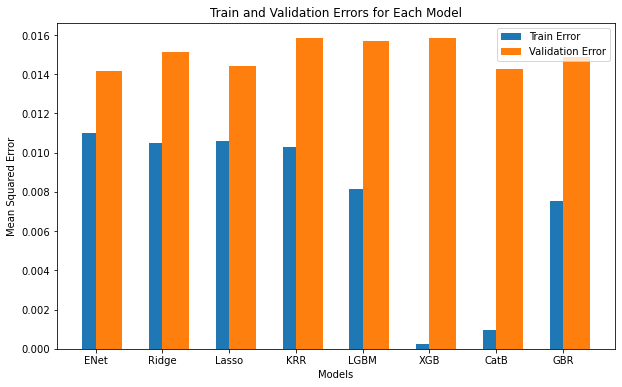

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def run_cvs(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # ElasticNet
    baseline = ElasticNet(random_state=0, max_iter=100000000, alpha=0.0003)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    enet_train_error = mean_squared_error(y_train, y_train_pred)
    enet_val_error = mean_squared_error(y_test, y_test_pred)
    print("ENet Train Error:", enet_train_error)
    print("ENet Validation Error:", enet_val_error)
    
    # Ridge
    baseline = Ridge(alpha=1, random_state=0)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    ridge_train_error = mean_squared_error(y_train, y_train_pred)
    ridge_val_error = mean_squared_error(y_test, y_test_pred)
    print("Ridge Train Error:", ridge_train_error)
    print("Ridge Validation Error:", ridge_val_error)
    
    # Lasso
    baseline = Lasso(alpha=0.0001, random_state=0)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    lasso_train_error = mean_squared_error(y_train, y_train_pred)
    lasso_val_error = mean_squared_error(y_test, y_test_pred)
    print("Lasso Train Error:", lasso_train_error)
    print("Lasso Validation Error:", lasso_val_error)
    
    # Kernel Ridge Regression
    baseline = KernelRidge(alpha=0.1)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    krr_train_error = mean_squared_error(y_train, y_train_pred)
    krr_val_error = mean_squared_error(y_test, y_test_pred)
    print("KRR Train Error:", krr_train_error)
    print("KRR Validation Error:", krr_val_error)
    
    # LightGBM
    baseline = lgb.LGBMRegressor(learning_rate=0.01, num_leaves=4, n_estimators=2000, random_state=0)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    lgbm_train_error = mean_squared_error(y_train, y_train_pred)
    lgbm_val_error = mean_squared_error(y_test, y_test_pred)
    print("LGBM Train Error:", lgbm_train_error)
    print("LGBM Validation Error:", lgbm_val_error)
    
    # XGBoost
    baseline = xg.XGBRegressor(learning_rate=0.01, n_estimators=2000, subsample=0.7, colsample_bytree=0.7, random_state=0)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    xgb_train_error = mean_squared_error(y_train, y_train_pred)
    xgb_val_error = mean_squared_error(y_test, y_test_pred)
    print("XGB Train Error:", xgb_train_error)
    print("XGB Validation Error:", xgb_val_error)
    
    # CatBoost
    baseline = CatBoostRegressor(random_state=0, verbose=0)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    catb_train_error = mean_squared_error(y_train, y_train_pred)
    catb_val_error = mean_squared_error(y_test, y_test_pred)
    print("CatB Train Error:", catb_train_error)
    print("CatB Validation Error:", catb_val_error)
    
    # Gradient Boosting
    baseline = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02, max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50, loss='huber', random_state=0)
    baseline.fit(X_train, y_train)
    y_train_pred = baseline.predict(X_train)
    y_test_pred = baseline.predict(X_test)
    gbr_train_error = mean_squared_error(y_train, y_train_pred)
    gbr_val_error = mean_squared_error(y_test, y_test_pred)
    print("GBR Train Error:", gbr_train_error)
    print("GBR Validation Error:", gbr_val_error)
    
    # Plot training and validation errors
    models = ["ENet", "Ridge", "Lasso", "KRR", "LGBM", "XGB", "CatB", "GBR"]
    train_errors = [enet_train_error, ridge_train_error, lasso_train_error, krr_train_error, lgbm_train_error, xgb_train_error, catb_train_error, gbr_train_error]
    val_errors = [enet_val_error, ridge_val_error, lasso_val_error, krr_val_error, lgbm_val_error, xgb_val_error, catb_val_error, gbr_val_error]
    
    plt.figure(figsize=(10, 6))
    plt.bar(models, train_errors, width=0.4, align='center', label='Train Error')
    plt.bar(models, val_errors, width=0.4, align='edge', label='Validation Error')
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.title('Train and Validation Errors for Each Model')
    plt.legend()
    plt.show()

run_cvs(data_b_skewed, y_log)


### Now we plot the accuracy for each of the models

ENet
Training Accuracy (R-squared): 0.9290920092717302
Validation Accuracy (R-squared): 0.9163705390350428

Ridge
Training Accuracy (R-squared): 0.9324683407059209
Validation Accuracy (R-squared): 0.9108974670181877

Lasso
Training Accuracy (R-squared): 0.9317992727619328
Validation Accuracy (R-squared): 0.9149404206386538

KRR
Training Accuracy (R-squared): 0.9337287353828012
Validation Accuracy (R-squared): 0.9067289401832088

LGBM
Training Accuracy (R-squared): 0.9475919267743173
Validation Accuracy (R-squared): 0.9074150525071613

XGB
Training Accuracy (R-squared): 0.9985693375932029
Validation Accuracy (R-squared): 0.906642655275871

CatB
Training Accuracy (R-squared): 0.9939454518932835
Validation Accuracy (R-squared): 0.9158245960538482

GBR
Training Accuracy (R-squared): 0.9513968652357204
Validation Accuracy (R-squared): 0.9123013419055426



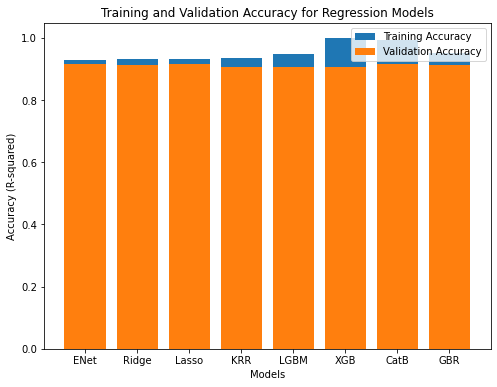

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

def run_cvs(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    models = [
        ("ENet", ElasticNet(random_state=0, max_iter=100000000, alpha=0.0003)),
        ("Ridge", Ridge(alpha=1, random_state=0)),
        ("Lasso", Lasso(alpha=0.0001, random_state=0)),
        ("KRR", KernelRidge(alpha=0.1)),
        ("LGBM", lgb.LGBMRegressor(learning_rate=0.01, num_leaves=4, n_estimators=2000, random_state=0)),
        ("XGB", xg.XGBRegressor(learning_rate=0.01, n_estimators=2000, subsample=0.7, colsample_bytree=0.7, random_state=0)),
        ("CatB", CatBoostRegressor(random_state=0, verbose=0)),
        ("GBR", GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=50, loss='huber', random_state=0))
    ]
    
    train_scores = []
    val_scores = []
    model_names = []
    
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_score = r2_score(y_train, y_train_pred)
        val_score = r2_score(y_test, y_test_pred)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        model_names.append(name)
        
        print(name)
        print("Training Accuracy (R-squared):", train_score)
        print("Validation Accuracy (R-squared):", val_score)
        print()
    
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, train_scores, label='Training Accuracy')
    plt.bar(model_names, val_scores, label='Validation Accuracy')
    plt.xlabel('Models')
    plt.ylabel('Accuracy (R-squared)')
    plt.title('Training and Validation Accuracy for Regression Models')
    plt.legend()
    plt.show()

run_cvs(data_b_skewed, y_log)


### Model ensemble

<p>Model ensemble involves combining predictions from multiple individual models to make a final prediction. Blending different models lead to improved predictive performance compared to using a single model. By leveraging the strengths of multiple models and compensating for their weaknesses, blending help reduce errors and increase accuracy. Different models may have inherent biases due to their underlying algorithms or assumptions. Blending models with complementary biases can help mitigate these biases and produce more balanced predictions. This is especially useful when dealing with complex and diverse datasets.</p>

In [36]:
#Combine 4 models (2 tree-based AND 2 linear Models) 
def make_submission(X_train, y_train, X_test):    
    sub_df = pd.read_csv('sample_submission.csv', index_col = "Id")
    
    ridge = Ridge(alpha = 1, random_state=0).fit(X_train,y_train)
    ridge_preds_log=ridge.predict(X_test)
    
    lasso = Lasso(alpha = 0.0001,random_state=0).fit(X_train,y_train)
    lasso_preds_log=lasso.predict(X_test)

    catB = CatBoostRegressor(random_state=0,verbose=0).fit(X_train,y_train)
    catB_preds_log=catB.predict(X_test)

    xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X_train,y_train)
    xgb_preds_log=xgb.predict(X_test)
    
    catb_xbr_lasso_ridge_mean_preds_log=(catB_preds_log+ridge_preds_log+lasso_preds_log+xgb_preds_log)/4
    sub_df['SalePrice'] = np.exp(catb_xbr_lasso_ridge_mean_preds_log)-1
    sub_df.to_csv("submission.csv")
    
make_submission(data_b_skewed,y_log,test_b_skewed)

## 2. Random Forest Regression Model

This choice of model selection is chosen because it can capture non-linear relationships of the dataset allowing for a better prediction. It has the ability to reduce the chance of overfitting by considering different subsets in each complex tree for featue selection. It is also less affected by outliers in the data which makes it a suitable model to predict our target. 

In [37]:
x_train = data_b_skewed
x_test  = test_b_skewed
y_train = np.log1p(y)
Regressor  = RandomForestRegressor(n_estimators = 500,random_state = 0)


In [38]:
# GridSearch for different hyperparameter max_depth
from sklearn.model_selection import GridSearchCV
max_depth_param = {'max_depth':[4,6,8,10,12,14]}
grid_ = GridSearchCV(Regressor,max_depth_param,cv = 10,return_train_score = True) 
grid_.fit(x_train,y_train)
train_accuracy = grid_.cv_results_['mean_train_score']
validation_accuracy = grid_.cv_results_['mean_test_score']
max_depth = max_depth_param['max_depth']

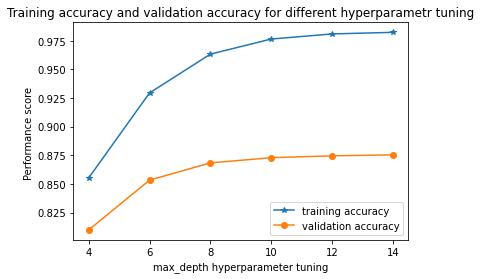

In [39]:
#Plotting training error, validation error against max_depth hyperparameter 
plt.plot(max_depth,train_accuracy,'*-', label = 'training accuracy')
plt.plot(max_depth,validation_accuracy,'o-', label = 'validation accuracy')
plt.xlabel('max_depth hyperparameter tuning')
plt.ylabel('Performance score ')
plt.title('Training accuracy and validation accuracy for different hyperparametr tuning')
plt.legend()
plt.show()

 Analysing the graph above,it can be noted that an increase in max_depth parameter increases the training and validation accuracy of the model. The training accuracy increases faster than the validation accuracy. This means that the model performs much better in seen data. The aim is to design a model that will increase performance and avoid overfitting. From the graph above, it can be seen that as we keep increasing the hyperparameter, the performance of the model approaches a constant score. To avoid overfitting, the max_depth  = 10 is chosen as it gives high validation accuracy of 87.5% while training accuracy sits at 97.5%. A higher max_depth parameter is computationally intensive and increases complexity and may result in our model overfitting the data.  
 

In [40]:
Regressor  = RandomForestRegressor(n_estimators = 500,max_depth = 10,random_state = 0) #max_depth - hyperparameter tuning

In [41]:
#cross validation for training model
RFR_score = cross_val_score(Regressor,x_train, y_train, cv = 10)  
print("cross validation score on training model: ",np.mean(RFR_score))

cross validation score on training model:  0.8729916728981358


In [42]:
# Training the model on training set
Regressor.fit(x_train,y_train)
y_pred = Regressor.predict(x_test) #prediction on test set

In [43]:
sub2_df = pd.read_csv('sample_submission.csv', index_col = "Id")

sub2_df['SalePrice'] = np.exp(y_pred) #Making submission 
sub2_df.to_csv("submission_RFR.csv") 

## 3. K-Nearest Neighbours regression model 

This choice of model selection is chosen beacuse it is suitable for complex relationships in the dataset, and is able to provide non-linear relationship between the target variable and the features in the dataset. The K-nearest neigbhours featue space allows caters for the different relationships within the features allowing for better training. Therefore, it is a suitable model to be used to allow for complex prediction of the target variable. 

In [44]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
score_calc = 'neg_mean_squared_error'

First we look at a implementation of KNN on a split train dataset

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_b_skewed, y_log, test_size=0.3, random_state=42)


In [47]:
#finding the best k value for the model using cross-validation

k_values = range(1, 21) 
cv_scores = [] 

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-1 * np.mean(scores))

# Best k value
optimal_k = k_values[np.argmin(cv_scores)]
print("Optimal k value:", optimal_k)

Optimal k value: 4


In [48]:
# Implement KNN Regression
k = optimal_k 
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [49]:

# Predict and evaluate the model
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

Pred_df = pd.DataFrame(data=np.exp(y_pred))

MSE: 0.05715969162016513
R-squared: 0.6630608140955354


Ensembling

For KNN regression in order to ensemble the model, bagging is a method that can be used. In this analysis 10 models are trained on the split data.

In [50]:
from sklearn.ensemble import BaggingRegressor

# Initialize a bagging ensemble with 10 base models
bagging_model = BaggingRegressor(base_estimator=knn, n_estimators=10)

# Train the ensemble on the training data
bagging_model.fit(X_train, y_train)

# Evaluate the ensemble on the test data
y_pred = bagging_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

MSE: 0.0540719330002446
R-squared: 0.68126222222382


As we can see that even with ensembling the performance on the model does not change much. This is because the dataset is too small. Ensembling is effective when there is large dataset used to train the model.

Validation

We observe the validation and training curves for different values of K. 

In [51]:
# Train a KNN regression model for each k value and compute the training and validation error
train_errors = []
val_errors = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train = knn.score(X_train, y_train)
    accuracy_val = knn.score(X_test,y_test)
    train_errors.append(np.mean((accuracy_train - y_train)**2))
    val_errors.append(np.mean((accuracy_val - y_test)**2))


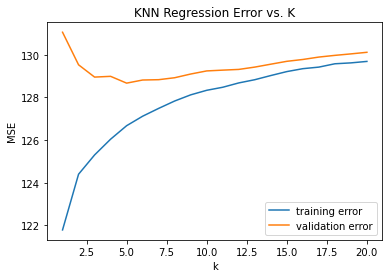

In [52]:
# Plot the training and validation error against k
plt.plot(k_values, train_errors, label='training error')
plt.plot(k_values, val_errors, label='validation error')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('KNN Regression Error vs. K')
plt.legend()
plt.show()

From the training and validation curve we can see that at low values for K, the model overfits the data. This can be seen by the low training and high validation values. However as K increases we can see that the models fits the dataset better.

In [53]:
#Implemeting KNN using grid search to improve model and final submission of KNN
def KNN_regression(X_train,Y_train,X_test):
    
    sub2_df = pd.read_csv('sample_submission.csv', index_col = "Id")
    
    param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
                'weights' : ['uniform','distance'] ,
                'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

    grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)
    grid_knn.fit(X_train, Y_train)

    sc_knn = get_best_score(grid_knn)
    
    pred_knn = grid_knn.predict(X_test)
    
    sub2_df['SalePrice'] = np.exp(pred_knn)-1  #Making submission
    sub2_df.to_csv("KNNSubmission.csv") 
    

KNN_regression(data_b_skewed,y_log,test_b_skewed)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
0.2216509434350397
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=4, weights='distance')


## Final Submission



 ###### Group submissions to kaggle 
 

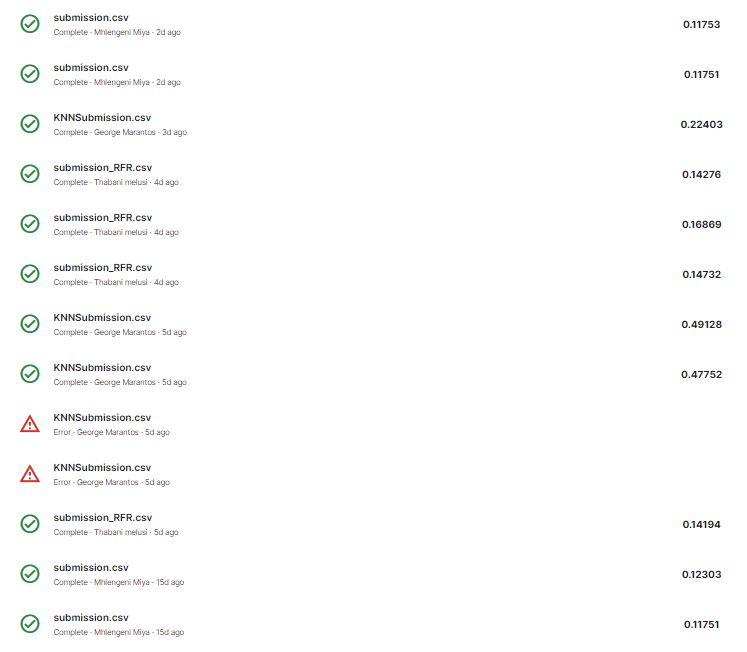

###### Kaggle submission highlighting best score

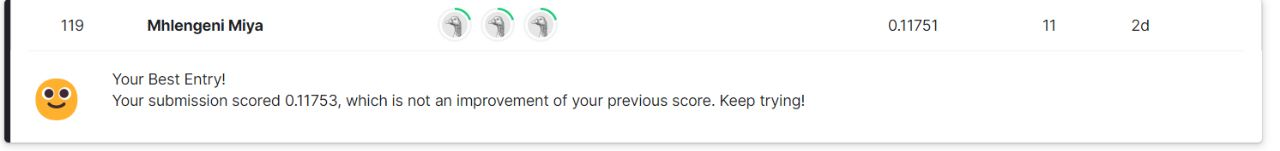

## Conclusion 

This advanced linear regression machine learning project on house prices has provided useful insights and forecasting abilities for calculating house prices. When compared to conventional linear regression models, the use of advanced linear regression techniques has improved predictive performance. Regularization methods like Ridge regression, Lasso regression, Elastic Net regression, Random Forest regression, and KNN regression have been used to improve the accuracy of house price projections by addressing problems like multicollinearity and overfitting. The project has involved feature selection techniques, such as backward elimination or stepwise regression, to identify the most significant features that contribute to the prediction of house prices. This process has improved the interpretability of the model and highlighted the key factors that influence house prices. A model ensemble involving four models has shown to produce better results compared to individual models.

## Summary of Group contributions

Each group member contributed equally in ensuring a successful completion of the project. Below is a breakdown of the work contribution from each member. 
### 1. Data analysis & exploration 

 <ol>
  <li>Mhlengeni Miya - 363729 </li>
  <li>Thabani Jali - 1876297</li>
  <li>George Marantos - 2116287  </li>
</ol>

### 2. Data cleaning 
   <ol>
  <li>Mhlengeni Miya - 363729 </li>
  <li>Thabani Jali - 1876297</li>
  <li>George Marantos - 2116287  </li>
</ol>

### 3. Machine Learning models

   ##### 3.1 Multiple Linear Regression model - Mhlengeni Miya - 363729
   
   ##### 3.2 Random Forest Regression model -  Thabani Jali - 1876297
   
   ##### 3.3 K-Nearest Neighbours Regression model - George Marantos - 2116287

### 4. Notebook compilation
 <ol>
  <li>Mhlengeni Miya - 363729 </li>
  <li>Thabani Jali - 1876297</li>
  <li>George Marantos - 2116287  </li>
</ol>

### References
<p>[1] Q Zhang. Housing price prediction based on multiple linear regression. Hindawi scientific programming, article ID 767831, 2021.<br>
[2] Random Forest regression in Jupyter Notebook (2021) Geospatial Technology & Data Science. YouTube. Available at: https://www.youtube.com/watch?v=IHZdXR1SUSo (Accessed: May 1, 2023).<br>
[3] D Vu (2019). House Prices: EDA to ML (Beginner). [online] Kaggle.com. Available at: https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner (Accessed: May 1, 2023).<br>
[4] T Godard (2017). Detailed exploratory data analysis with python. [online] Kaggle.com. Available at: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python (Accessed: May 1, 2023).<br>
[5] P Marcelino (2022). Comprehensive data exploration with Python. [online] Kaggle.com. Available at: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python (Accessed: 2 May, 2023)<br>
[6] Serigne (2017). Stacked Regressions : Top 4% on LeaderBoard. [online] Kaggle.com. Available at: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard (Accessed: 2 May, 2023).<br>
[7] M C Sorkun (2023). [House Prices] Feature Engineering LB:0.11775. [online] Kaggle.com. Available at: https://www.kaggle.com/code/sorkun/house-prices-feature-engineering-lb-0-11775 (Last accessed: 06 May 2023) <br>
</p>

### Acknowledgment
1. Used ChatGPT to assist in bug in code for validation and training curve in KNN model
2. Used ChatGPT to assist in understanding the theory of random forest regression 
3. A notebook from Kaggle.com was used. https://www.kaggle.com/code/sorkun/house-prices-feature-engineering-lb-0-11775
